<a href="https://colab.research.google.com/github/YounkoA/Python-Nootbook/blob/main/filtering_and_harris_corner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Harris corner detector
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_08_features/harris.ipynb)



In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter

In [13]:
from google.colab import files
upload = files.upload()

Saving bathroom.png to bathroom (1).png


In [14]:
img_coins = cv2.imread('coins.jpg') # reads the image
img_building = cv2.imread('photo-building.jpg') # reads the image
img_bathroom = cv2.imread('bathroom.png') # reads the image

# img_coins = cv2.cvtColor(img_coins, cv2.COLOR_BGR2HSV) # convert to HSV
# img_building = cv2.cvtColor(img_building, cv2.COLOR_BGR2HSV) # convert to HSV
# img_bathroom = cv2.cvtColor(img_bathroom, cv2.COLOR_BGR2HSV) # convert to HSV

figsize = (6, 6)

# figure_size = 1 # the dimension of the x and y axis of the kernal.
# new_image = cv2.blur(image,(figure_size, figure_size))
# new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)

# plt.figure(figsize=(11,6))
# plt.subplot(121), plt.imshow(cv2.cvtColor(img_bathroom, cv2.COLOR_HSV2RGB)),plt.title('Original')
# plt.xticks([]), plt.yticks([])

# plt.subplot(121), plt.imshow(cv2.cvtColor(img_bathroom, cv2.COLOR_HSV2RGB)),plt.title('Original')
# plt.xticks([]), plt.yticks([])

# # plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
# # plt.xticks([]), plt.yticks([])

# plt.show()

In [15]:
img_bathroom_rgb = cv2.cvtColor(img_bathroom, cv2.COLOR_BGR2RGB)

kernel = np.array(
         [1/9,1/9,1/9,
          1/9,1/9,1/9,
          1/9,1/9,1/9])

kernel_3 = np.ones((3,3),np.float32)/9
kernel_5 = np.ones((5,5),np.float32)/25
kernel_7 = np.ones((7,7),np.float32)/49
kernel_9 = np.ones((9,9),np.float32)/81

img_bathroom_filter_3 = cv2.filter2D(img_bathroom_rgb,-1,kernel_3)
img_bathroom_filter_5 = cv2.filter2D(img_bathroom_rgb,-1,kernel_5)
img_bathroom_filter_7 = cv2.filter2D(img_bathroom_rgb,-1,kernel_7)
img_bathroom_filter_9 = cv2.filter2D(img_bathroom_rgb,-1,kernel_9)

# plt.figure(figsize=(20,20))
# plt.subplot(121),plt.imshow(img_bathroom_rgb),plt.title('Original')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(img_bathroom_filter),plt.title('Averaging')
# plt.xticks([]), plt.yticks([])
# plt.show()

In [16]:
gaussian_kernel = np.array(
                    [1/256, 4/256,  6/256,  4/256, 1/256,
                   4/256, 16/256, 24/256, 16/256, 4/256,
                   6/256, 24/256, 36/256, 24/256, 6/256,
                   4/256, 16/256, 24/256, 16/256, 4/256,
                   1/256, 4/256,  6/256,  4/256, 1/256])

# img_bathroom_filter = cv2.filter2D(img_bathroom_rgb,-1,kernel_15)
# img_bathroom_gaussian = cv2.filter2D(img_bathroom_rgb,-1,gaussian_kernel)
img_bathroom_gaussian_3 = cv2.GaussianBlur(img_bathroom_rgb, (3, 3), 15)
img_bathroom_gaussian_5 = cv2.GaussianBlur(img_bathroom_rgb, (5, 5), 15)
img_bathroom_gaussian_7 = cv2.GaussianBlur(img_bathroom_rgb, (7, 7), 15)
img_bathroom_gaussian_9 = cv2.GaussianBlur(img_bathroom_rgb, (9, 9), 15)
# img_bathroom_gaussian_15_15 = cv2.GaussianBlur(img_bathroom_rgb, (15, 15), 0)

# plt.figure(figsize=(20,20))
# plt.subplot(121),plt.imshow(img_bathroom_rgb),plt.title('Original')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(img_bathroom_gaussian),plt.title('Gaussian')
# plt.xticks([]), plt.yticks([])
# plt.show()

In [17]:
img_bathroom_median_3 = cv2.medianBlur(img_bathroom_rgb, 3)
img_bathroom_median_5 = cv2.medianBlur(img_bathroom_rgb, 9)
img_bathroom_median_7 = cv2.medianBlur(img_bathroom_rgb, 15)
img_bathroom_median_9 = cv2.medianBlur(img_bathroom_rgb, 19)

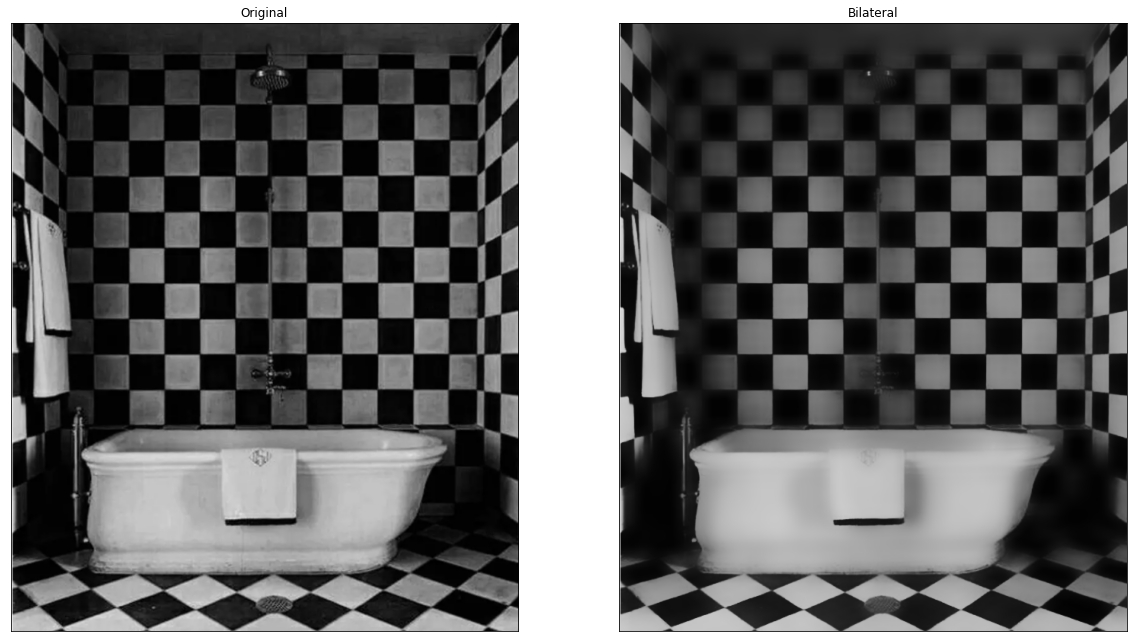

In [18]:
img_bathroom_bilateral_3 = cv2.bilateralFilter(img_bathroom_rgb, 30, 150, 150)
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img_bathroom_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_bathroom_bilateral_3),plt.title('Bilateral')
plt.xticks([]), plt.yticks([])
plt.show()

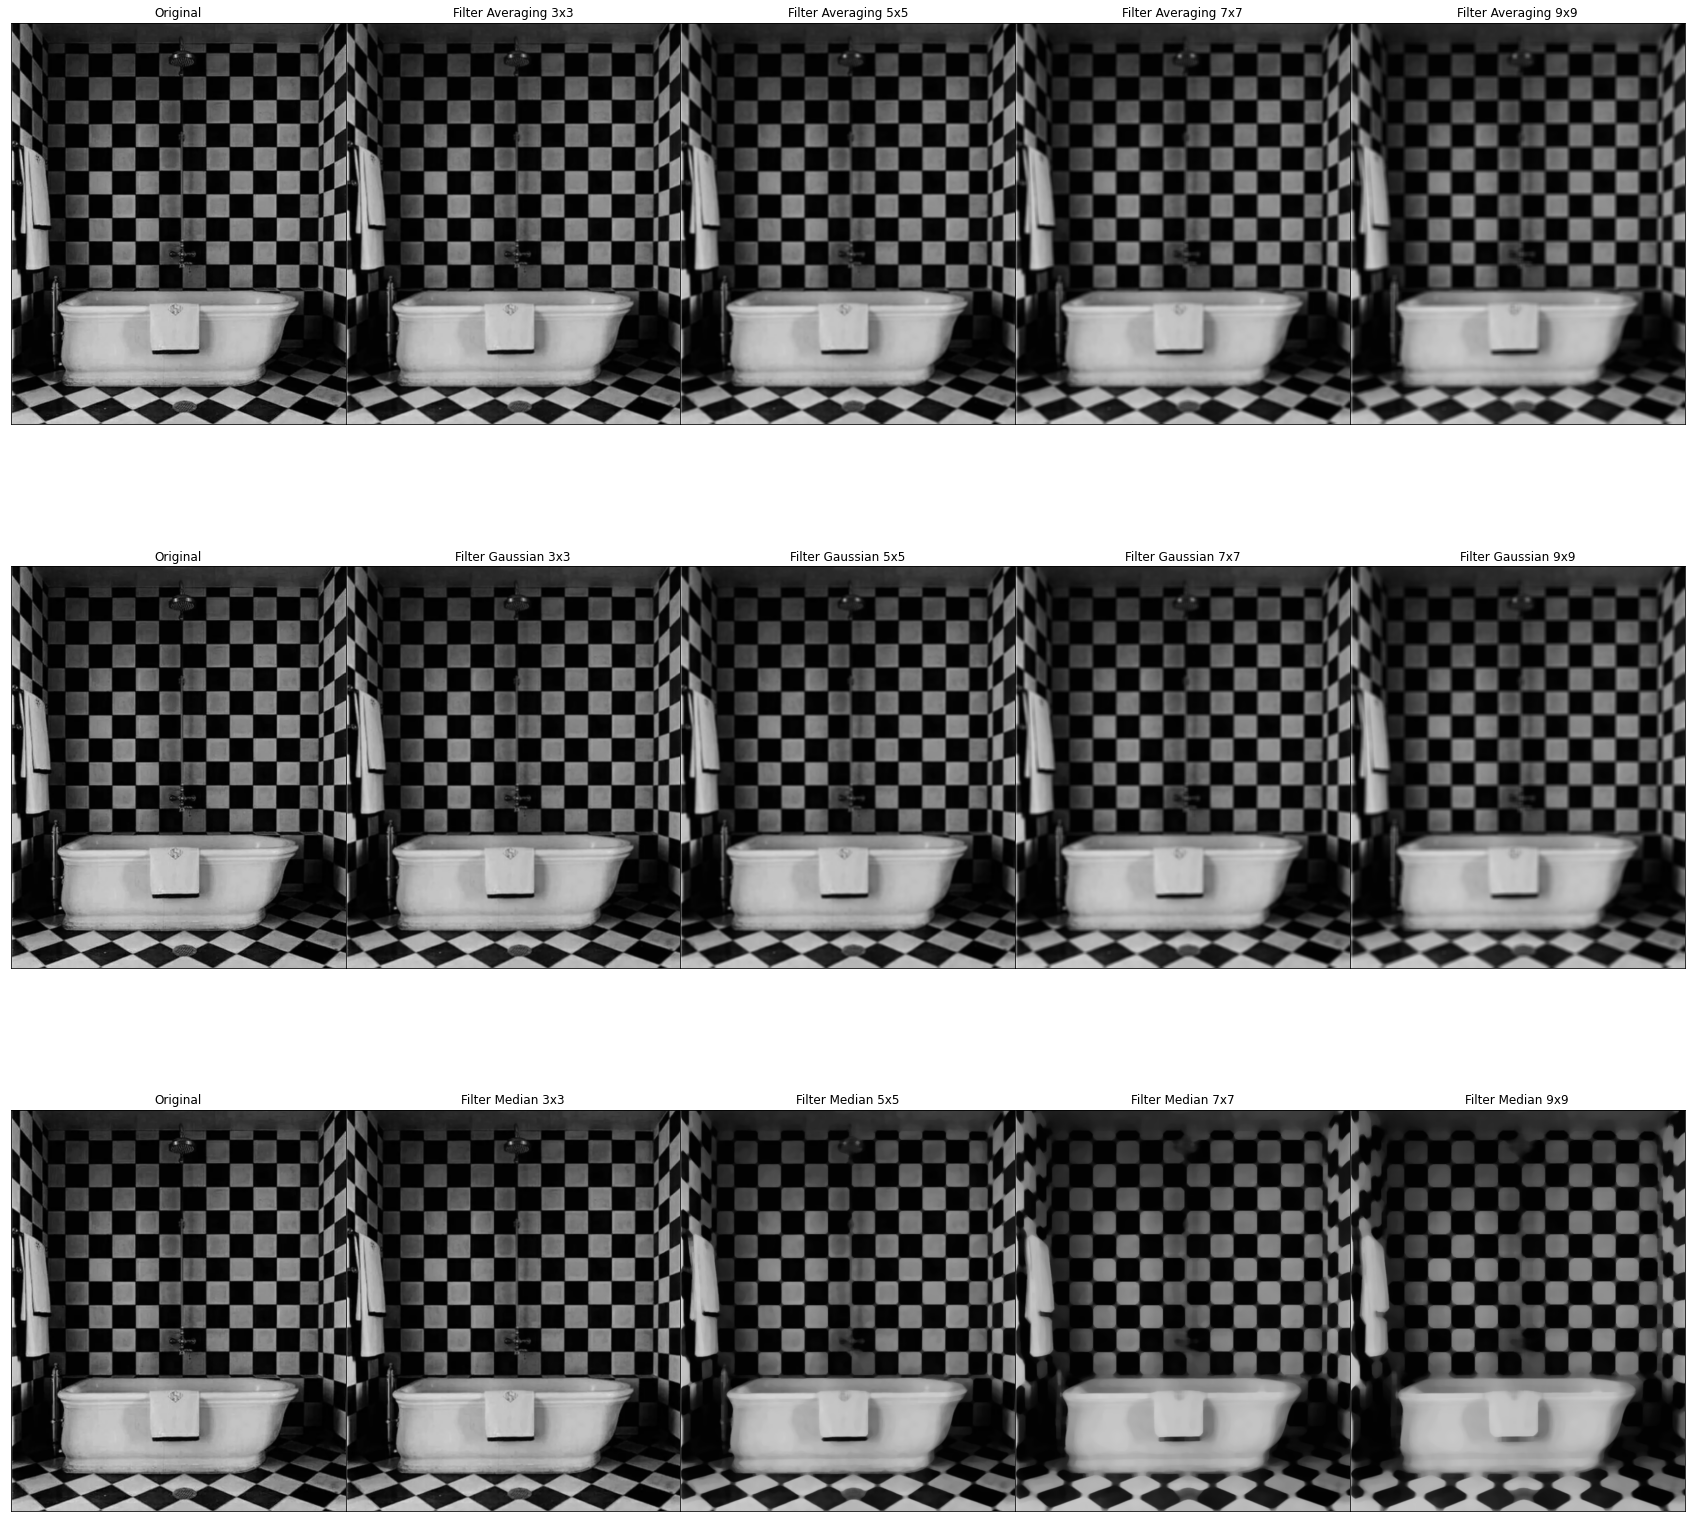

In [19]:
fig, axs = plt.subplots(3, 5,figsize=(30,30),sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
axs[0, 0].imshow(img_bathroom_rgb)
axs[0, 0].set_title('Original')
axs[0, 1].imshow(img_bathroom_filter_3)
axs[0, 1].set_title('Filter Averaging 3x3')
axs[0, 2].imshow(img_bathroom_filter_5)
axs[0, 2].set_title('Filter Averaging 5x5')
axs[0, 3].imshow(img_bathroom_filter_7)
axs[0, 3].set_title('Filter Averaging 7x7')
axs[0, 4].imshow(img_bathroom_filter_9)
axs[0, 4].set_title('Filter Averaging 9x9')

axs[1, 0].imshow(img_bathroom_rgb)
axs[1, 0].set_title('Original')
axs[1, 1].imshow(img_bathroom_gaussian_3)
axs[1, 1].set_title('Filter Gaussian 3x3')
axs[1, 2].imshow(img_bathroom_gaussian_5)
axs[1, 2].set_title('Filter Gaussian 5x5')
axs[1, 3].imshow(img_bathroom_gaussian_7)
axs[1, 3].set_title('Filter Gaussian 7x7')
axs[1, 4].imshow(img_bathroom_gaussian_9)
axs[1, 4].set_title('Filter Gaussian 9x9')

axs[2, 0].imshow(img_bathroom_rgb)
axs[2, 0].set_title('Original')
axs[2, 1].imshow(img_bathroom_median_3)
axs[2, 1].set_title('Filter Median 3x3')
axs[2, 2].imshow(img_bathroom_median_5)
axs[2, 2].set_title('Filter Median 5x5')
axs[2, 3].imshow(img_bathroom_median_7)
axs[2, 3].set_title('Filter Median 7x7')
axs[2, 4].imshow(img_bathroom_median_9)
axs[2, 4].set_title('Filter Median 9x9')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1,0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1,1]')

for ax in axs.flat:
    ax.set(xlabel='', ylabel='')
    ax.set_xticks([])
    ax.set_yticks([])
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


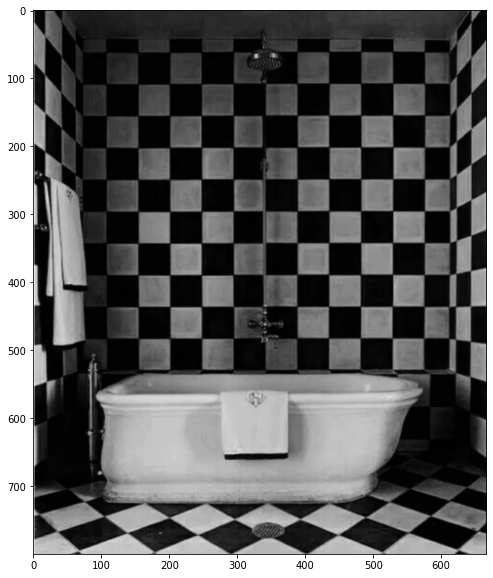

In [5]:

imgBGR = cv2.imread("bathroom.png")
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY).astype(float)/255

plt.figure(figsize=(10, 10))
plt.imshow(imgRGB)
plt.show()


## harris- step by step


In [6]:
#derivatives in x and y dirs
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Ix = cv2.filter2D(img, -1, kernel_x)

kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
Iy = cv2.filter2D(img, -1, kernel_y)

window_size = 3
offset = int(np.floor(window_size/2))

l_max = np.zeros(img.shape)
l_min = np.zeros(img.shape)
det = np.zeros(img.shape)
trace = np.zeros(img.shape)

# for each window in image
for y in range(offset, img.shape[0]-offset):
    for x in range(offset, img.shape[1]-offset):
        
        # build window of intersting data 
        windowIx = Ix[y-offset:y+offset+1, x-offset:x+offset+1]
        windowIy = Iy[y-offset:y+offset+1, x-offset:x+offset+1]

        # this is added to be consistent with PCA
        # windowIx = windowIx-np.mean(windowIx)
        # windowIy = windowIy-np.mean(windowIy)

        # build second moments matrix
        Sxx = np.sum(windowIx*windowIx)
        Syy = np.sum(windowIy*windowIy)
        Sxy = np.sum(windowIx*windowIy)

        # eigendecomposition data
        H = np.array([[Sxx, Sxy],
                [Sxy, Syy]])
        L, V = np.linalg.eig(H)

        l_max[y,x] = np.maximum(L[0],L[1])
        l_min[y,x] = np.minimum(L[0],L[1])


        det[y, x] = (Sxx * Syy) - (Sxy**2)
        trace[y, x] = Sxx + Syy





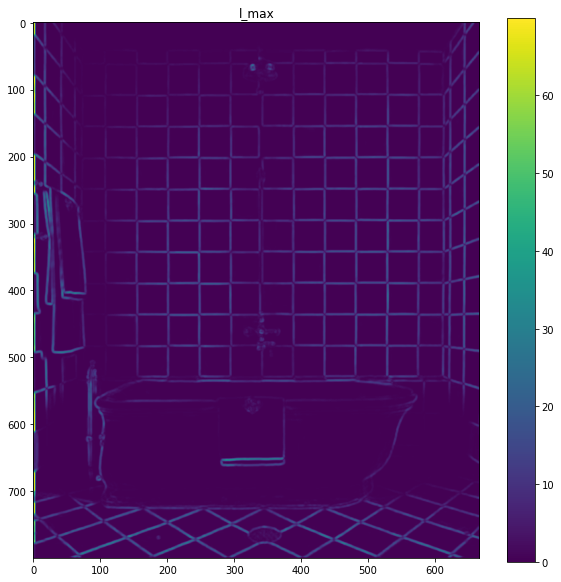

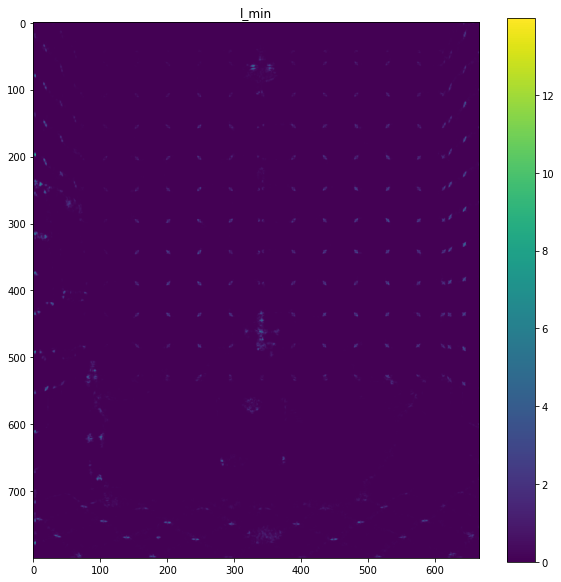

In [7]:
plt.figure(figsize=(10, 10))
plt.imshow(l_max)
plt.colorbar()
plt.title("l_max")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(l_min)
plt.colorbar()
plt.title("l_min")
plt.show()



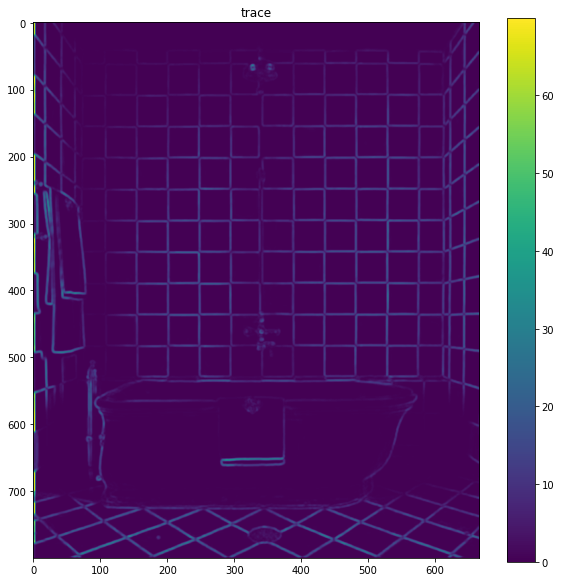

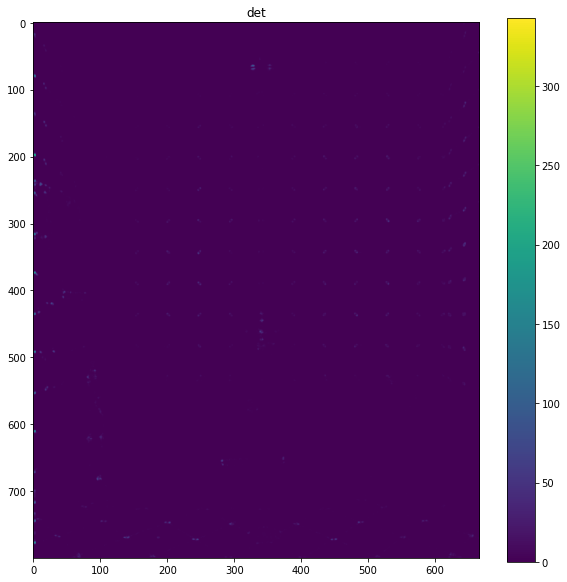

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(trace)
plt.colorbar()
plt.title("trace")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(det)
plt.colorbar()
plt.title("det")
plt.show()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


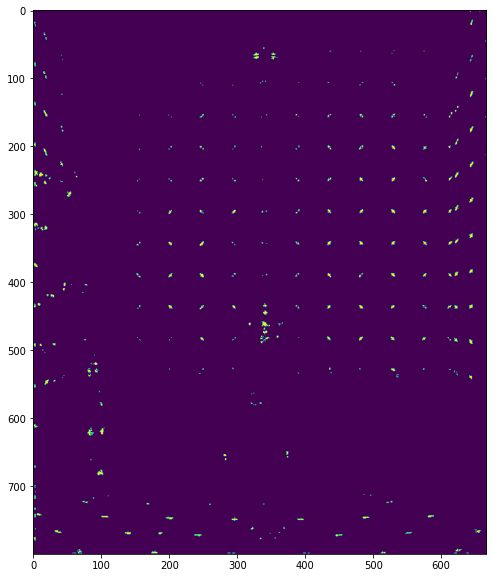

In [9]:
harris = det/trace
harris[np.isnan(harris)] = 0

plt.figure(figsize=(10, 10))
plt.imshow(harris > harris.max()/10)
plt.show()



## harris- cv2 implementation


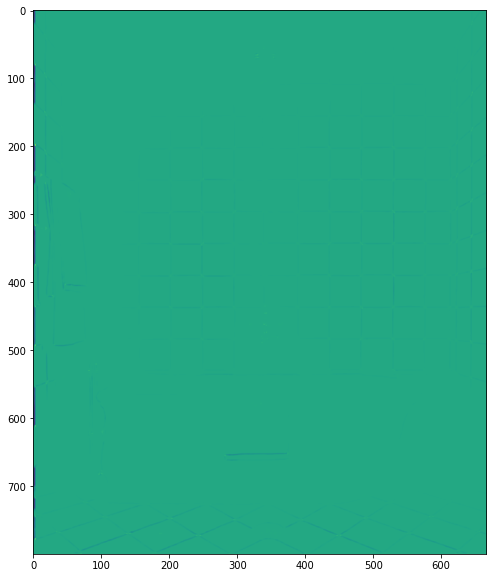

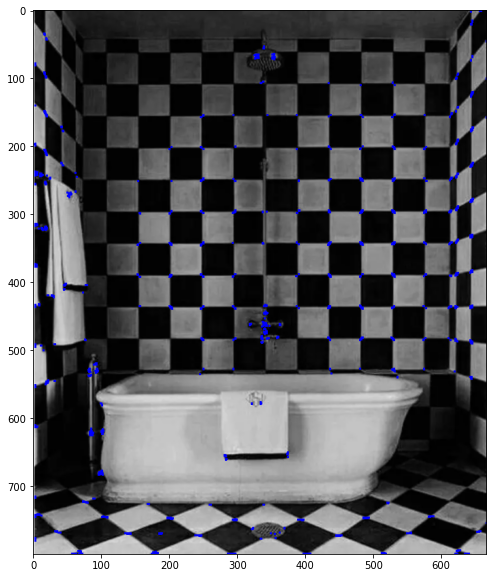

In [10]:

gray = np.float32(img)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

plt.figure(figsize=(10, 10))
plt.imshow(dst)
plt.show()

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image.
imgRGB[dst > 0.01*dst.max()] = [0, 0, 255]

plt.figure(figsize=(10, 10))
plt.imshow(imgRGB)
plt.show()

